<a href="https://colab.research.google.com/github/jenniferarzu/nyu-python-public-policy/blob/master/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Jennifer Arzu**

# **HOMEWORK 4 Coding: Analyzing and visualizing specific categories of 311 complaints**

In [0]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
df = pd.read_csv('/content/drive/My Drive/Data for Python/cleaned_311_data.csv', header='infer')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9,18,21,32,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)



**Problem Statement:**
There seems to be a general trend that the higher the community district population, the higher the number of 311 requests. However, there is a lot of variance in the data. What if we only look at complaint types that are likely influenced by population?

"Noise - Residential" and "HEAT/HOT WATER" were the most frequest requests in the entire 311 dataset. Let's try isolating the count of requests in each of those two categories versus all the other complaints.

**Step 1. First you will need to prep your data to get the count of complaints in each of the three categories. You can update the code from lecture that gets the total count of 311 requests per CD to instead get the count of 311 requests per CD that meet the criteria for the 3 categories. You should create three seprate dataframes, one per category:**

- complaint_type = 'Noise - Residential'
- complaint_type = 'HEAT/HOT WATER'
- Everything else: (complaint_type != 'Noise - Residential' and complaint_type != 'HEAT/HOT WATER')

In [0]:
#creating 3 separate dataframes, one per each category
resnoise = df[df.complaint_type=='Noise - Residential']
heathotwater= df[df.complaint_type=='HEAT/HOT WATER']
other=df[(df.complaint_type != 'Noise - Residential') & (df.complaint_type != 'HEAT/HOT WATER')]

In [8]:
#grouping by community board to get count of requests per community district
resnoise_count = resnoise.groupby('community_board').size().reset_index(name='count_of_311_requests')
print(len(resnoise_count))

heathotwater_count = heathotwater.groupby('community_board').size().reset_index(name='count_of_311_requests')
print(len(heathotwater_count))

other_count = other.groupby('community_board').size().reset_index(name='count_of_311_requests')
print(len(other_count))

#creating count all to check that the dataframes all add up to correct total
all_count = df.groupby('community_board').size().reset_index(name='count_of_311_requests')
print(len(all_count))

69
66
77
77


*"Note the lengths of these dataframes. We can see that we're going to run into problems, because they're each a different length (i.e. have a different number of rows) and they're all greater than 59. There are only 59 community districts in the city, so these dataframes are including some extra invalid community district rows. The invalid rows include community board values containing "Unspecified" or district numbers that are higher than what exist in real life. Ex: '84 QUEENS', 'Unspecified BRONX'* -Note from Professor Kates

*Here's a list of all the valid borocd values that exist in the city:"*

In [0]:
valid_borocds = ['101','102','103','104','105','106','107','108','109','110','111','112','201','202','203','204','205','206','207','208','209','210','211','212','301','302','303','304','305','306','307','308','309','310','311','312','313','314','315','316','317','318','401','402','403','404','405','406','407','408','409','410','411','412','413','414','501','502','503']

In [0]:
# this function will recode the community_board value into borocd in a new column

def recode_borocd_counts(row):
  if row.community_board[0] != 'U':
    if 'MANHATTAN' in row.community_board:
      return '1' + row.community_board[0:2]
    elif 'BRONX' in row.community_board:
      return '2' + row.community_board[0:2]
    elif 'BROOKLYN' in row.community_board:
      return '3' + row.community_board[0:2]
    elif 'QUEENS' in row.community_board:
      return '4' + row.community_board[0:2]
    elif 'STATEN ISLAND' in row.community_board:
      return '5' + row.community_board[0:2]
  else:
    return 'Invalid borocd'

In [0]:
#can apply the function created into each of the dataframes created
resnoise_count['borocd']=resnoise_count.apply(recode_borocd_counts, axis=1)
heathotwater_count['borocd']=heathotwater_count.apply(recode_borocd_counts, axis=1)
other_count['borocd']=other_count.apply(recode_borocd_counts, axis=1)
all_count['borocd'] = all_count.apply(recode_borocd_counts, axis=1)

In [12]:
#filtering dataframes to only keep valid borocd rows using isin() function
resnoise_count = resnoise_count[resnoise_count.borocd.isin(valid_borocds)]
print(len(resnoise_count))

heathotwater_count = heathotwater_count[heathotwater_count.borocd.isin(valid_borocds)]
print(len(heathotwater_count))

other_count = other_count[other_count.borocd.isin(valid_borocds)]
print(len(other_count))

all_count = all_count[all_count.borocd.isin(valid_borocds)]
print(len(all_count))


59
59
59
59


In [13]:
#checking to make sure that the 311 requests add up as expected, now that have cleaned dataframes of equal length
print(resnoise_count.head())
print(heathotwater_count.head())
print(other_count.head())
print(all_count.head())

    community_board  count_of_311_requests borocd
1          01 BRONX                   3691    201
2       01 BROOKLYN                   5844    301
3      01 MANHATTAN                    722    101
4         01 QUEENS                   4589    401
5  01 STATEN ISLAND                   5052    501
    community_board  count_of_311_requests borocd
0          01 BRONX                   3346    201
1       01 BROOKLYN                   2868    301
2      01 MANHATTAN                    276    101
3         01 QUEENS                   2466    401
4  01 STATEN ISLAND                   1644    501
    community_board  count_of_311_requests borocd
1          01 BRONX                  20316    201
2       01 BROOKLYN                  59389    301
3      01 MANHATTAN                  20261    101
4         01 QUEENS                  53370    401
5  01 STATEN ISLAND                  58449    501
    community_board  count_of_311_requests borocd
1          01 BRONX                  27353    201


In [0]:
27353 == 20316 + 3346 + 3691

True

**Step 2. Create a stacked bar chart of 311 requests per community district. Each community district bar should be comprised of three stacked bars, one for each category listed below. The total height of each community district bar (the sum of the three stacked bars) should reflect the total count of 311 complaints per community district.**

- number of 'Noise - Residential' complaints per CD
- number of 'HEAT/HOT WATER' complaints per CD
- number of other complaints per CD

In [30]:
#list of bar positions on x axis
position_on_x = np.arange(len(all_count))
print(position_on_x)

resnoise_count_new= np.array(resnoise_count.sort_values(by='count_of_311_requests', ascending=False).count_of_311_requests)
heathotwater_count_new= np.array(heathotwater_count.sort_values(by='count_of_311_requests', ascending=False).count_of_311_requests)
other_count_new= np.array(other_count.sort_values(by='count_of_311_requests', ascending=False).count_of_311_requests)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58]


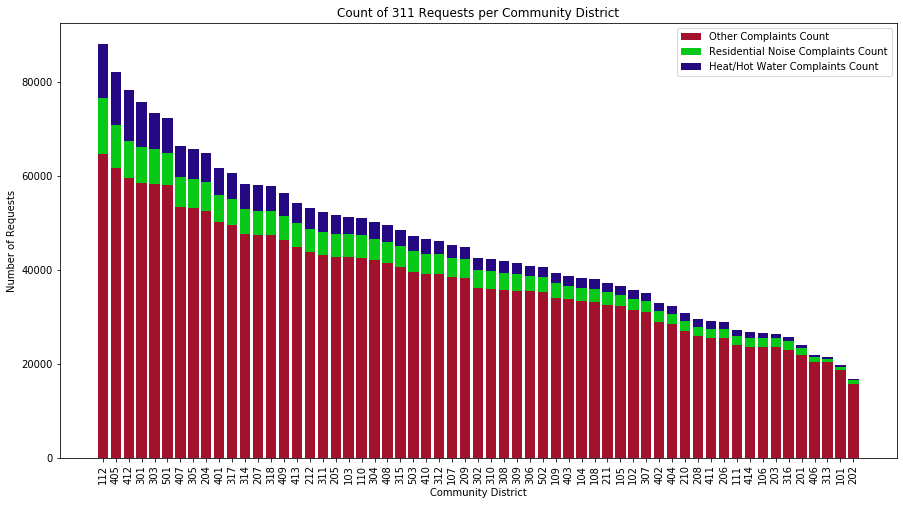

In [31]:
plt.figure(figsize=(15, 8))

# naming the plots as objects in order to access their color attributes in the legend

#plot1
plot1 = plt.bar(
  position_on_x,
  other_count_new,
  align='center',
  color='#a3122d',
  label='Other Complaints Count'
)

#plot2 will go on top of plot1
plot2 = plt.bar(
  position_on_x,
  resnoise_count_new,
  bottom=other_count_new,
  align='center',
  color='#08c918',
  label='Residential Noise Complaints Count'
)

#plot3 will go on top on plot1 and plot2
plot3 = plt.bar(
  position_on_x,
  heathotwater_count_new,
  bottom=other_count_new + resnoise_count_new,
  align='center',
  color='#250982',
  label='Heat/Hot Water Complaints Count'
)

plt.xticks(position_on_x, all_count.sort_values(by='count_of_311_requests', ascending=False).borocd, rotation=90)

plt.title('Count of 311 Requests per Community District')
plt.xlabel('Community District')
plt.ylabel('Number of Requests')
plt.legend() # defaults to putting legend in top right

plt.show()


In [18]:
#checking my graphed results
allc=all_count.sort_values(by='count_of_311_requests', ascending=False)
allc.head()

,community_board,count_of_311_requests,borocd
50,12 MANHATTAN,81402,112
23,05 QUEENS,71506,405
51,12 QUEENS,70361,412
2,01 BROOKLYN,68101,301
12,03 BROOKLYN,66360,303


In [19]:
#checking my graphed results for residential noise
res_noise=resnoise_count.sort_values(by='count_of_311_requests', ascending=False)
res_noise.head()

,community_board,count_of_311_requests,borocd
50,12 MANHATTAN,11755,112
28,07 BRONX,9207,207
12,03 BROOKLYN,7898,303
42,10 MANHATTAN,7659,110
16,04 BRONX,7407,204


In [20]:
#checking my graphed results for heat/hot water
heathot_water= heathotwater_count.sort_values(by='count_of_311_requests', ascending=False)
heathot_water.head()

,community_board,count_of_311_requests,borocd
49,12 MANHATTAN,11692,112
27,07 BRONX,11203,207
15,04 BRONX,10942,204
19,05 BRONX,9555,205
57,17 BROOKLYN,7737,317


In [22]:
#checking my graphed results for other
oth= other_count.sort_values(by='count_of_311_requests', ascending=False)
oth.head()

,community_board,count_of_311_requests,borocd
23,05 QUEENS,64641,405
51,12 QUEENS,61548,412
2,01 BROOKLYN,59389,301
5,01 STATEN ISLAND,58449,501
31,07 QUEENS,58222,407


**Step 3. Using the same three dataframes created in Step 1, create a scatter plot of community district population (x-axis) vs. community district 311 counts (y-axis) split out by complaint category (noise, heat/water, other). The scatter plot should show the counts of each of the three complaint categories in a different color.**

In [0]:
#need to merge in population dataset to get population numbers
population = pd.read_csv('https://data.cityofnewyork.us/api/views/xi7c-iiu2/rows.csv?accessType=DOWNLOAD', header='infer')

In [0]:
# Create a function recode_borocd_pop that combines and recodes the Borough and CD Number values to create a borocd unique ID
def recode_borocd_pop(row):
  if row.Borough == 'Manhattan':
    return str(100 + row['CD Number'])
  elif row.Borough == 'Bronx':
    return str(200 + row['CD Number'])
  elif row.Borough == 'Brooklyn':
    return str(300 + row['CD Number'])
  elif row.Borough == 'Queens':
    return str(400 + row['CD Number'])
  elif row.Borough == 'Staten Island':
    return str(500 + row['CD Number'])
  else:
    return 'Invalid borocd'

#applying function to population dataframe
population['borocd'] = population.apply(recode_borocd_pop, axis=1)

In [0]:
#merging population and cleaned residential noise data frame for combined data
rn_merged_data = pd.merge(left=resnoise_count, right=population, left_on='borocd', right_on='borocd')

#merging population and cleaned heat/hot water data frame for combined data
hhw_merged_data = pd.merge(left=heathotwater_count, right=population, left_on='borocd', right_on='borocd')

#merging population and cleaned other data frame for combined data
oth_merged_data = pd.merge(left=other_count, right=population, left_on='borocd', right_on='borocd')


In [0]:
#creating subsets for each category   
resnoise_cds = [
  [rn_merged_data['2010 Population']/1000],
  [rn_merged_data.count_of_311_requests]
]

heathotwater_cds = [
  [hhw_merged_data['2010 Population']/1000],
  [hhw_merged_data.count_of_311_requests]
]

other_cds = [
  [oth_merged_data['2010 Population']/1000],
  [oth_merged_data.count_of_311_requests]
]


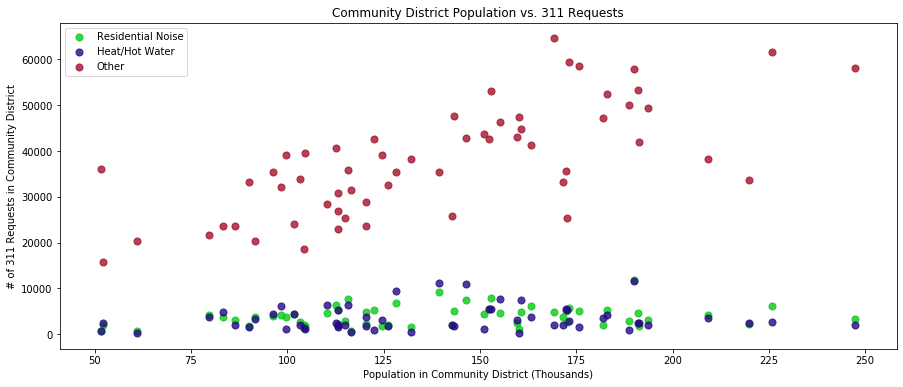

In [36]:
# save the lists of data as one big list of lists, "data_per_cd"
data_per_cd = [resnoise_cds, heathotwater_cds, other_cds]

# defining the color to be used for the markers for each data subset group
colors = ["#08c918", "#250982", "#a3122d"]

# defining the labels to be used for the data subset group
groups = ["Residential Noise", "Heat/Hot Water", "Other"]

plt.figure(figsize=(15,6))

# creating a for loop that adds a scatterplot to the figure for each data subset group
for data, color, group in zip(data_per_cd, colors, groups): 
  x, y = data
  plt.scatter(x, y, alpha=0.8, c=color, s=50, label=group)

plt.title('Community District Population vs. 311 Requests')
plt.xlabel('Population in Community District (Thousands)')
plt.ylabel('# of 311 Requests in Community District')

# adds legend at specified location
# loc=1 top right
# loc=2 top left
# loc=3 bottom left
# loc=4 bottom right
plt.legend(loc=2)

plt.show()


***Does it seem like there's a positive correlation between population and noise complaints or population and heat/hot water complaints? What's a possible explanation for the relationship or lack of relationship?***

*Answer: There appears to be no correlation between population and noise complaints or population and heat/hot water complaints. This lack of relationship could be attributed to other factors influencing the number of noise complaints and heat/hot water complaints such as neighborhood quality, age of residential buildings, residential versus commercial area.*